In [1]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import sympy as sp
import math

# 16.1) Describe a random process that you are likely to encounter in the following situations:

a. listening to the daily weather forecast
b. paying the monthly telephone bill
c. leaving for work in the morning

Why is each process a random one?

a. Temperatur + lightning strikes
b. Amount of texts/call duration (apparantly also billing amount)
c. What time you wake up?

# 16.2) 
A single die is tossed repeatedly.
What are Sand $S_x$?
Also, can you determine the joint PMF for any N sample times?

$S_x$ is what values our sample can take, whereas $S$ is what they represent in real life.


$$
S_x = \left\{ 1, 2, 3, 4, 5, 6 \right\}
$$

Where $S$ would be the dots on the die, so our 1 would be the die side with only one dot on, etc.

No you cannot, as we only have one random variable.

## 16.4)
For a Bernoulli random process determine the probability that we will observe an alternating sequence of 1's and O's for the first 100 samples with the first sample being a 1.
What is the probability that we will observe an alternating sequence of 1's and O's for all n?

The general formula for a bernoulli process is given as:

$$
\begin{align}
\left( \begin{matrix} n \\ k \end{matrix} \right) = \frac{n!}{k!(n-k)!} \\
P(X_1=x_1, \dots, X_n = x_n) = \left( \begin{matrix} n \\ k \end{matrix} \right) p^k(1-p)^{n-k}
\end{align}
$$

Which in our case, for 100 samples would make the first part $\left( \begin{matrix} n \\ k \end{matrix} \right)$ be 1 (see below), which gives us our following expression (we want to have 50 1's and 50 0's).

$$
P(X_1=x_1, \dots, X_n = x_n) 
= p^50(1-p)^{100-50}
= p^50(1-p)^{50}
$$

We can also explain this as the probability of $P(x=0) = p$ and $P(x=1) = 1-p$, where wa have a alternating sequence of

$$
S_x = {1, 0, 1, 0, \dots}
$$

Where we have 50 0's and 50 1's, which we can write as

$$
(1-p)^{50}p^{50}
$$

If this goes to infinity, then by the law of large numbers then this goes to 0.

# 16.7) (Need simulation)
A biased random walk process is defined as $X[n] = \sum_{i=0}^n U[i]$, where $U[i]$ is a Bernoulli random process with

$$
p_{U}[k] = \left\{ \begin{matrix}
\frac{1}{4} &\; \; k=-1 \\
\frac{3}{4} &\; \; k=1 \\
\end{matrix} \right.
$$

What is $E[X[n]]$ and $\text{var}(X[n])$ as a function of n?
Next, simulate on a computer a realization of this random process.
What happens as $n \rightarrow \infty$ and why?

$$
E[X] = \sum_{i=0}^{n} x_i P(X=x_i)
$$

As they follow the same Bernoulli process, we can say that all values in $E[X]$ are identical, therefore the mean/variance follows this.
Thereby we can find a single expected value of our $E[U(0)]$, do that by uisng the formula above.

$$
E[U(0)] 
= -1 \cdot \frac{1}{4} + 1 \cdot \frac{3}{4}
= \frac{1}{2}
$$

Thereby we can find our $E[X[n]]$, by

$$
E[X[n]] 
= E[\sum_{i=0}^n U[i]]
= \sum_{i=0}^n E[U[i]]
= E[U[0]]+E[U[1]]+E[U[2]]+\dots+E[U[n]]
= (n+1) E[U[0]]
= \frac{n+1}{2}
$$

The reason we can put in $U[0]$, is because they are identically distributed.
Whereas the reason for removing the sum, and replacing it with $(n+1)$, is that we are going from 0 to n, thereby we need one more.
Think of it like this, we have $n=10$ and we go from $0..10$ this means, that in total we have 11 values, or $n+1$ value.

Then to calculate $\text{Var}(X[n])$, we know the following fomula to calculate the discrete time variance

$$
\text{var}(X) = \sum_{i=1}^n p_i \cdot (x_i - \mu)^2
$$

$$
\text{Var}(U[0])
= \frac{1}{4} \left( -1 -  \frac{1}{2}\right)^2 + \frac{3}{4}\left( 1 - \frac{1}{2} \right)^2
= \frac{1}{4} \left(- \frac{3}{2}\right)^2 + \frac{3}{4}\left(\frac{1}{2} \right)^2
= \frac{1}{4} \frac{9}{4} + \frac{3}{4} \frac{1}{4}
= \frac{9}{16} + \frac{3}{16}
= \frac{12}{16}
= \frac{3}{4}
$$

Now we can calculate our $Var(X[n])$.

$$
Var(X[n]) = \sum_{i=0}^n var(U[i]) = (n+1)var(U[0]) = \frac{3(n+1)}{4}
$$

In [2]:
N = 100000
p = (3/4)
q = 1-p
display(p,q)

s = np.random.binomial(1,p,N)

print(s.mean())
s.std()

0.75

0.25

0.74906


0.43355405245482376

# 16.14) (not sure?)
Plot 50 realizations of a WGN random process $X[n]$ with $\sigma^2 = 1$ for $n = 0, 1, \dots , 49$ using a scatter diagram (see Figure 16.15 for an example).
Use the MATLAB commands `plot(x , y , '.')` and hold on to plot each realization as dots and to overlay the realizations on the same graph, respectively.
For a fixed n can you explain the observed distribution of the dots?

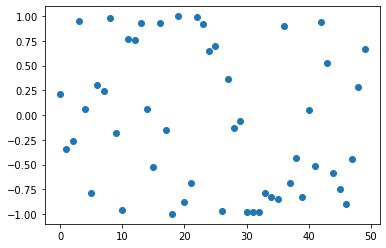

In [3]:
n = 50
std = math.sqrt(1) # we are given the variance, and want the standard deviation

fig, ax = plt.subplots()
x = np.arange(n)
y = np.empty(n)
for i in range(n):
    rand = np.random.normal(0, std, 1)[0]
    y[i] = math.cos(2*math.pi*0.1*n+2*math.pi*rand)
ax.scatter(x,y)

# 16.15)
Prove that

$$
\frac{
1
}{
(2\pi)^{N/2} det^{1/2}(C)
}
e^{-\frac{1}{2}X^T C^{-1}X}
$$

where $x = [x_1x_2 \dots x_n]^T$ and $C = \sigma^2I$ for I an N x N identity matrix, reduces to (16.4).

![16.4](figs/mm3.16.4.png)

We know the following

That we have the identity matrix times our $\sigma^2$, which means we have $\sigma^2$ in the diagonal.

$$
C = \begin{bmatrix}
\sigma^2 & 0 & 0 & \dots & 0 \\
0 & \sigma^2 & 0 & \dots  & 0 \\
0 & 0 & \sigma^2 & \dots  & 0 \\
\vdots & \vdots & \vdots & \ddots   & \vdots \\
0 & 0 & 0 & \dots  & \sigma^2 \\
\end{bmatrix}
$$

When we need to get the determinant of the identity matrix (either a upper triangle matrix, lower triangle matrix or diagonal matrix), we multipli the diagonal together.
Therefore the determinant for C, is given as

$$
\begin{align}
det(C) &= (\sigma^{2})^N \\
det^{\frac{1}{2}}(C)
&= ((\sigma^{2})^N)^{\frac{1}{2}} 
= (\sigma^{2})^{\frac{N}{2}}
\end{align}
$$

For our $X^T C^{-1} X$, we can write it as the following (keep in mind, that in our diagonal matrix, the inverse is the reciprocal $\frac{1}{x}$, in the diagonal):

$$
\begin{align}
X^T C^{-1} X &= [x_1x_2 \cdot x_n] 
\begin{bmatrix}
\frac{1}{\sigma^2} & 0 & 0 & \dots & 0 \\
0 & \frac{1}{\sigma^2} & 0 & \dots  & 0 \\
0 & 0 & \frac{1}{\sigma^2} & \dots  & 0 \\
\vdots & \vdots & \vdots & \ddots   & \vdots \\
0 & 0 & 0 & \dots  & \frac{1}{\sigma^2} 
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
= [x_1x_2 \cdot x_n] 
\begin{bmatrix}
\frac{1}{\sigma^2}x_1 \\
\frac{1}{\sigma^2}x_2 \\
\frac{1}{\sigma^2}x_3 \\
\vdots \\
\frac{1}{\sigma^2} x_n
\end{bmatrix}
=
\frac{1}{\sigma^2}
[x_1x_2 \cdot x_n] 
\begin{bmatrix}
x_1 \\
x_2 \\
x_3 \\
\vdots \\
x_n
\end{bmatrix}
=
\frac{1}{\sigma^2}
\begin{bmatrix}
x_1^2 \\
x_2^2 \\
x_3^2 \\
\vdots \\
x_n^2
\end{bmatrix}
=
\frac{1}{\sigma^2}
\sum_{i=1}^N x_i^2
\end{align}
$$


If we combine this, then we get the following expression

$$
\frac{
1
}{
(2\pi)^{N/2} (\sigma^{2})^{\frac{N}{2}}
}
e^{
-\frac{1}{2}
\frac{1}{\sigma^2}
\sum_{i=1}^N x_i^2
}
= 
\frac{
1
}{
(2\pi\sigma^{2})^{\frac{N}{2}}
}
\exp\left(
-\frac{1}{2\sigma^2}
\sum_{i=1}^N x_i^2
\right)
$$

Which is the expression we wanted.

# 16.16)
A "white" uniform random process is defined to be an IID random process with $X[n] \sim U(-\sqrt{3}, \sqrt{3})$ for all n.
Determine the mean and covariance sequences for this random process and compare them to those of the WGN random process.
Explain your results.

We can calculate the mean and the variance for our uniform process, by doing:

$$
\begin{align}
E[X] &= \frac{a+b}{2} = \frac{-\sqrt{3} + \sqrt{3}}{2} = 0 \\
var(X) &= \frac{(a+b)^2}{12} = \frac{(-\sqrt{3} + \sqrt{3})^2}{12} = 0 \\
\end{align}
$$

For a WGN we have the following for all n:

$$
\begin{align}
C_X[n_1, n_2] &= \left\{ \begin{matrix}
0 & n_1 \neq n_2 \\
\sigma^2 & n_1 = n_2
\end{matrix} \right. \\
&= \sigma^2 \delta [n_2-n_1] \\
\mu_X[n] &= 0
\end{align}
$$

$$
\begin{align}
C_X[n_1, n_2] &= E\left[ (X[n_1] - \mu_X[n_1])(X[n_2] - \mu_X[n_2]) \right] \\
\text{for $n_1=n_2$} \; C_X[n_1, n_1] &= E\left[ (X[n_1] - \mu_X[n_1])(X[n_1] - \mu_X[n_1]) \right] =  E\left[ (X[n_1] - \mu_X[n_1])^2 \right] = var(X[n_1]) \\
\text{for $n_1 \neq n_2$} \; C_X[n_1, n_1] &= 
E\left[ (X[n_1] - 0)(X[n_2] - 0) \right]
= E\left[ X[n_1]X[n_2] \right]
\overset{iid}{=} E[ X[n_1] ] E[X[n_2] ]
= 0 \cdot 0 = 0
\end{align}
$$

Because for a white process, we have a mean that is equal to zero.

Therefore the WGN process and our uniform process are the same.

# 16.24)
A random process is IID with samples $X[n] \sim N(\mu, 1)$.
It is desired to remove the mean of the random process by forming the new random process $Y[n] = X[n] - X[n-1]$.
First determine the mean sequence of $Y[n]$.
Next find $cov(Y[0], Y[1])$.
Is $Y[n]$ an IID random process with a zero mean sequence?

First we determine the mean sequence (remember the mean is the same, even when time shifted):

$$
\mu_Y[n] 
= E[X[n] - X[n-1]]
= E[X[n]] - E[X[n-1]] = 0 
$$

$$
\begin{align}
cov(Y[0], Y[1]) 
&= E[Y[0]Y[1]-E[Y[0]]E[Y[1]]
= E[(X[0]-X[-1])(X[1]-X[0])]-0
= E[X[0]X[1]-X[0]^2-X[-1]X[1]+X[-1]X[0]] \\
&\overset{linearity}{=} E[X[0]X[1]]-E[X[0]^2]-E[X[-1]X[1]]+E[X[-1]X[0]] \\
&\overset{iid}{=} E[X[0]]E[X[1]]-E[X[0]^2]-E[X[-1]]E[X[1]]+E[X[-1]]E[X[0]] \\
&= 0-E[X[0]^2]-0+0
= -E[X[0]^2] - 0
= Var(X[0]) = -1
\end{align}
$$

We can do that because $Var(X) = E[X^2] - E[X]^2$, where our $E[X]^2=0$, as our mean is 0.

Because our covariance is not 0, then $Y[0]$ and $Y[1]$ is not identically distributed.

# 16.26) (what is the rule with summation and minimum? - not sure about the last part)
If a sum random process is defined as $X[n] = \sum_{i=0}^n U[i]$ for $n \leq 0$,
where $E[U[i]] = 0$ and $var(U[i]) = \sigma_U^2$ for $i \leq 0$ and the $U[i]$ are IID,
find the mean and covariance sequences of $X[n]$.

First we find our expected value of $E[X[n]]$, which is given as the below formula.
Keep in mind, that they are iid, which mean they are independent and indentically distributed.
So the mean of them all, have to be the some, and we hav the mean of $E[U[i]]=0$, so the mean for all is 0.
Look below!

$$
\mu_X 
= E[X[n]]
= E\left[ \sum_{i=0}^n U[i] \right]
\overset{iid}{=} (n+1) E[U[0]]
= 0
$$

To find the covariance sequence, we find it as a sequence of $n_1$ and $n_2$, with respect to X.
Keep in mind, in the last few equations that we have the identity of the variance, as our mean is 0.
First we do the case for $n_1 \neq n_2$

$$
\begin{align}
Cov(X, Y) &= E[XY ] - E[X]E[Y] \\
Cov(X[n_1], X[n_2]) 
&= E[X[n_1]X[n_2] ] - \underbrace{E[X[n_1]]E[X[n_2]]}_{\text{= 0}}
= E[X[n_1]X[n_2]]
= E \left[\sum_{i=0}^{n_1} U[i]\sum_{j=0}^{n_2} U[j] \right]
= E \left[\sum_{i=0}^{min(n_1,n_2)} U[i]^2 \right]
\overset{iid}{=} \sum_{i=0}^{min(n_1,n_2)} E \left[U[i]^2 \right]
= \sum_{i=0}^{min(n_1,n_2)} \sigma_U^2
= min(n_1,n_2) \sigma_U^2
\end{align}
$$

Now for $n_1 = n_2$.

$$
\begin{align}
Cov(X, Y) &= E[XY ] - E[X]E[Y] \\
Cov(X[n_1], X[n_2]) 
&= Cov(X[n_1], X[n_1]) 
= var(X[n_1])
= E(X[n_1]^2) - \underbrace{E[X[n_1]]^2}_{\text{0}}
= E(X[n_1]^2) - \underbrace{E[X[n_1]]^2}_{\text{0}}
= var(\sum_{i=0}^n U[i])
= E[X[n_1]^2]
= 
\end{align}
$$

# 16.30) (need to confirm what deterministic is here??)
A random process is defined as $X[n] = As[n]$ for all n, where $A \sim N(0, 1)$ and $s[n]$ is a deterministic signal.
Find the mean and covariance sequences.

If the signal is deterministic, that it means that we know exactly how the signal will look, and therefore the mean and the variance is 0, and it becomes a constant.

$$
E[X[n]] = E[As[n]] = s[n] E[A] = s[n] \cdot 0 = 0
$$

$$
Cov(X[n_1], X[n_2])
= E[X[n_1]X[n_2] - E[X[n_1]]E[X[n_2]]
= E[As[n_1]As[n_2] - E[As[n_1]]E[As[n_2]]
= s[n_1]s[n_2]E[A^2] - 0
= s[n_1]s[n_2] var(A)
= s[n_1]s[n_2] \cdot 1
= s[n_1]s[n_2]
$$

# 16.31) (what exactly is the definition for a white noise process?)
A random process is defined as $X[n] = AU[n]$ for all n, where $A \sim N(0, \sigma_A^2)$ and $U[n]$ is WGN with variance $\sigma_U^2$,
and A is independent of $U[n]$ for all n.
Find the mean and covariance sequences.
What type of random process is $X[n]$?

First the mean, where we have the WGN $U[n]$, which means a normal distribution, as follows $U \sim N(0, \sigma_U^2$.

$$
E[X[n]] 
= E[AU[n]]
\overset{independent}{=} E[A] \cdot E[U[n]]
= 0
$$

For the covariance sequence.

$$
cov(X[n_1], X[n_2]) 
= E[X[n_1]X[n_2]] - E[X[n_1]]E[X[n_2]]
= E[AU[n_1]AU[n_2]] - \underbrace{E[AU[n_1]]E[AU[n_2]]}_{\text{0}}
= E[AU[n_1]AU[n_2]]
= E[A^2] E[U[n_1]U[n_2]]
= \sigma_A^2 E[U[n_1]U[n_2]]
$$

for $n_1 = n_2$
$$
\sigma_A^2 E[U[n_1]^2]
= \sigma_A^2  \cdot \sigma_U^2
$$

for $n_1 \neq n_2$
$$
\sigma_A^2 E[U[n_1]U[n_2]]
= \sigma_A^2 E[U[n_1]]E[U[n_2]]
= 0
$$

Thereby we get the lfollowing equation

$$
cov(X[n_1], X[n_2]) = \sigma_A^2 \sigma_U^2 \partial[n_2-n_1]
$$

This gives is a white noise process, (why??).